## Demands and time
This code is for vidualize the relationship between the time and the demand

In [11]:
"""
    Dependencies
"""
import pandas as pd
import numpy as np
import datetime
from sklearn import mixture
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

(13685, 3)
(4562, 3)
[]


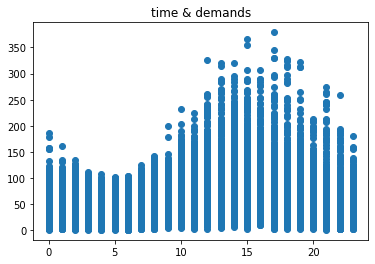

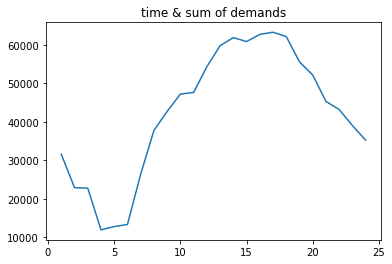

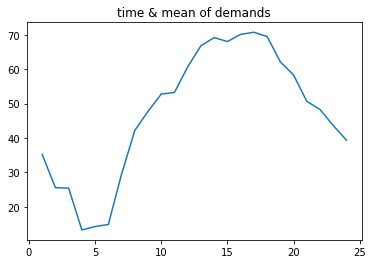

In [12]:
"""
    Read the file and implement the buckets
"""
buckets = [[]]*24
bucket_sizes = []
bucket_means = []
df = pd.read_csv('train_E1GspfA.csv')
df_train, df_test = train_test_split(df)
print(df_train.shape)
print(df_test.shape)
print(bucket_sizes)
x = df['hour']
y = df['demand']
z = df['date']
z = z.drop_duplicates();

# fill in the buckets
for i in range(0, len(buckets)):
    buckets[i] = (df_train.loc[df_train['hour'] == i])['demand']
    bucket_sizes.append(np.sum(buckets[i]))
    bucket_means.append(np.sum(buckets[i])/len(z))

# show the distribution of the demands
plt.scatter(x, y)
plt.title('time & demands')
plt.show()

plt.plot(np.arange(1, 25, 1), bucket_sizes)
plt.title('time & sum of demands')
plt.show()

plt.plot(np.arange(1, 25, 1), bucket_means)
plt.title('time & mean of demands')
plt.show()

# visualize the distribution
def drawBuckets(buckets):
    for i in range(0, len(buckets)):
        x = np.arange(0, buckets[i].shape[0], 1)
        y = buckets[i]
        print(x.shape)
        print(y.shape)
        plt.scatter(x, y)
        plt.show()

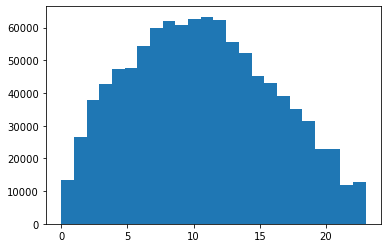

In [13]:
"""
    Use the guassian mixture model to model the distribution
"""
data = []
for i in range(0,len(bucket_sizes)):
    for j in range(0, bucket_sizes[i]):
        data.append((i+19)%24)

# plt the data
plt.hist(data, bins=24)
plt.show()

# get the data distribution
data = np.array(data).reshape((-1,1))

def fitGMM(data, components):
    gmm = mixture.BayesianGaussianMixture(
        n_components=components
    )
    gmm.fit(data)
    print(gmm.means_)
    print(gmm.covariances_)
    return gmm

In [14]:
# print the gmm distribution
import scipy.stats as stats

def visualizeGMM(gmm, data):
    means = gmm.means_
    vars = gmm.covariances_
    weights = gmm.weights_
    x = np.linspace(0, 24, num=100)
    y = np.zeros(x.shape)
    for i in range(0, weights.shape[0]):
        y += weights[i]*stats.norm.pdf(x, means[i], np.sqrt(vars[i]))[0]

    print(weights.shape[0])
    plt.plot(x, y, label = 'predicted distribution')
    plt.legend()
    plt.show()

    plt.plot(x, y*len(data), label = 'predicted distribution')
    plt.hist(data, bins=24, label='empirical distribution')
    plt.legend()
    plt.show()

D:\Program\anaconda3\lib\site-packages\sklearn\mixture\_base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn('Initialization %d did not converge. '


[[ 2.40017173]
 [16.32023591]
 [11.10601542]
 [ 6.51025986]
 [20.84429374]]
[[[1.94177409]]

 [[5.39064058]]

 [[4.96058249]]

 [[3.864726  ]]

 [[2.10581067]]]
5


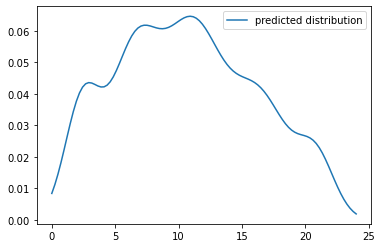

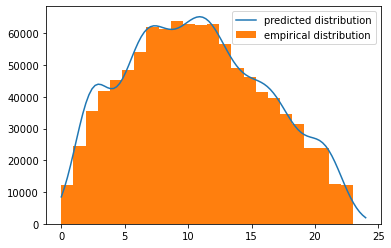

D:\Program\anaconda3\lib\site-packages\sklearn\mixture\_base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn('Initialization %d did not converge. '


[[ 6.47856842]
 [19.35400418]
 [10.63753818]
 [ 2.37581887]
 [14.6478901 ]]
[[[3.71547453]]

 [[4.45691139]]

 [[3.69137776]]

 [[1.9432981 ]]

 [[4.41978173]]]
5


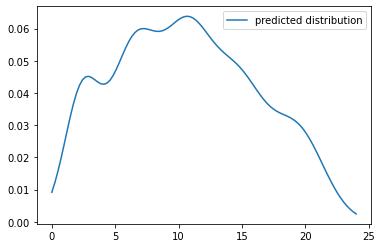

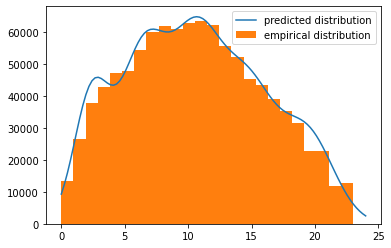

In [15]:
"""
    get the model
"""
# for i in range(1, 6):
#     visualizeGMM(fitGMM(data, i))
gmm = fitGMM(data, 5)
visualizeGMM(gmm, data)

[181, 164, 148, 69, 81, 75, 153, 191, 208, 195, 242, 214, 222, 212, 236, 224, 209, 221, 252, 225, 223, 220, 216, 181]
5


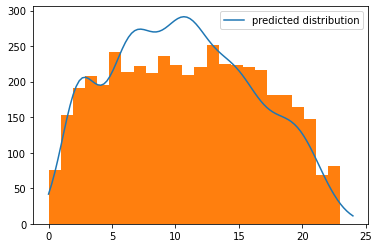

In [21]:
# test on the testing set
# it is quite useless, please igonore
test_set = df_test
data_test = []
test_buckets = [[]]*24
# fill in the buckets
for i in range(0, len(test_buckets)):
    test_buckets[i] = (test_set.loc[test_set['hour'] == i])['demand'].shape[0]
print(test_buckets)

new_data = [test_buckets[(i+5)%24] for i in range(0, 24)]

# generate pool for the histogram
for i in range(0, len(new_data)):
    for j in range(0, new_data[i]):
        data_test.append(i)

weights = gmm.weights_
means = gmm.means_
vars = gmm.covariances_

x = np.linspace(0, 24, num=100)
y = np.zeros(x.shape)
for i in range(0, weights.shape[0]):
    y += weights[i]*stats.norm.pdf(x, means[i], np.sqrt(vars[i]))[0]

print(weights.shape[0])
plt.plot(x, y*len(data_test), label = 'predicted distribution')

plt.hist(data_test, bins=24)
plt.legend()

plt.show()